**bold text**

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375
...,...,...,...,...
95,3.838384,1.460202,3.046061,-4.440595
96,3.878788,2.155152,3.494545,-4.458663
97,3.919192,2.850101,3.943030,-4.479995
98,3.959596,3.545051,0.391515,-3.304593


Training for X1:


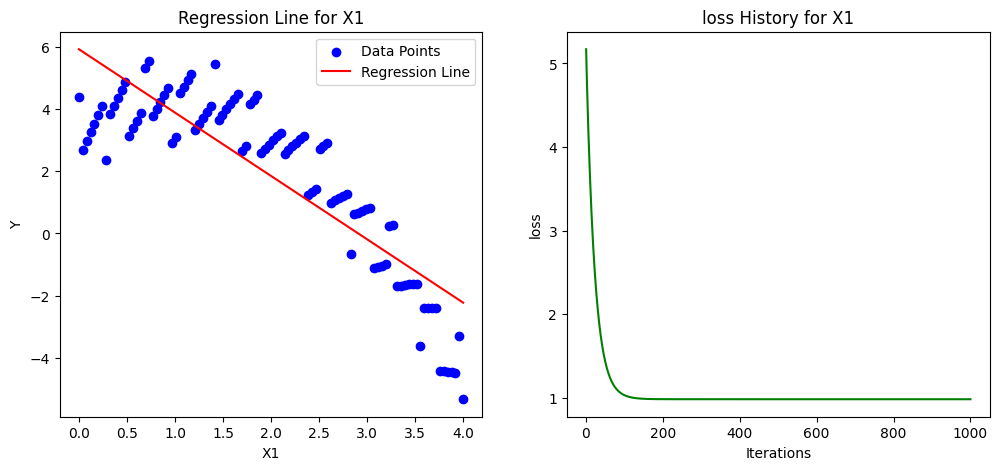

Training for X2:


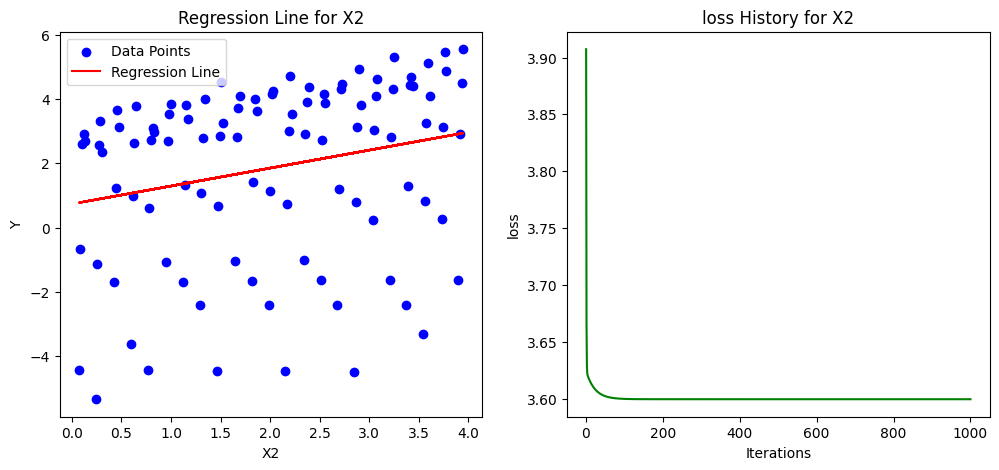

Training for X3:


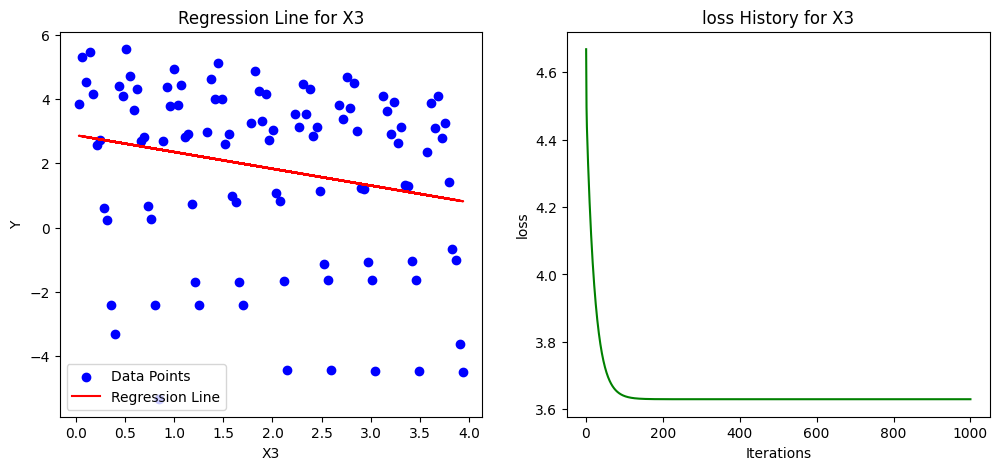

Final cost for X1: 0.9849930825405946
Final cost for X2: 3.599366018168043
Final cost for X3: 3.6294511246079155
The feature with the lowest loss is: X1 with a loss of 0.9849930825405946


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Use the URL for the raw CSV data
url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/D3.csv'

df = pd.read_csv(url)

data = df

# Extract columns (first three columns as X1, X2, X3, and the fourth as Y)
X1 = data.iloc[:, 0].values
X2 = data.iloc[:, 1].values
X3 = data.iloc[:, 2].values
Y = data.iloc[:, 3].values

from IPython.display import display
display(df)
#loss function
def compute_loss(X, Y, theta):
    m = len(Y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - Y) ** 2)
    return cost

  # Gradient Descent function
def gradient_descent(X, Y, theta, learning_rate, iterations):
    m = len(Y)
    loss_history = np.zeros(iterations)

    for i in range(iterations):
        prediction = np.dot(X, theta)
        theta = theta - (1/m) * learning_rate * (X.T.dot(prediction - Y))
        loss_history[i] = compute_loss(X, Y, theta)

    return theta, loss_history

def train_and_plot(X, feature_name, learning_rate=0.01, iterations=1000):


    X = np.c_[np.ones((len(X), 1)), X] # Add a column of ones for the intercept term
    theta, cost_history = gradient_descent(X, Y, theta, learning_rate, iterations)

    # Plotting the regression line
    plt.figure(figsize=(12, 5))

    # Plot 1: Regression line
    plt.subplot(1, 2, 1)
    plt.scatter(X[:, 1], Y, color='blue', label='Data Points') # Use the original feature values for plotting
    plt.plot(X[:, 1], np.dot(X, theta), color='red', label='Regression Line')
    plt.title(f'Regression Line for {feature_name}')
    plt.xlabel(feature_name)
    plt.ylabel('Y')
    plt.legend()

    # Plot 2: loss history over iterations
    plt.subplot(1, 2, 2)
    plt.plot(range(1, iterations+1), cost_history, color='green')
    plt.title(f'loss History for {feature_name}')
    plt.xlabel('Iterations')
    plt.ylabel('loss')

    plt.show()

    return theta, cost_history[-1]

    # Main function
learning_rates = [0.1, 0.1, 0.1]  # You can explore values for each
iterations = 1000

print("Training for X1:")
theta_X1, cost_X1 = train_and_plot(X1, "X1", learning_rate=learning_rates[0], iterations=iterations)

print("Training for X2:")
theta_X2, cost_X2 = train_and_plot(X2, "X2", learning_rate=learning_rates[1], iterations=iterations)

print("Training for X3:")
theta_X3, cost_X3 = train_and_plot(X3, "X3", learning_rate=learning_rates[2], iterations=iterations)

# Comparing final costs
print(f"Final cost for X1: {cost_X1}")
print(f"Final cost for X2: {cost_X2}")
print(f"Final cost for X3: {cost_X3}")

# Determine which variable explains Y best
best_feature = min([("X1", cost_X1), ("X2", cost_X2), ("X3", cost_X3)], key=lambda x: x[1])
print(f"The feature with the lowest loss is: {best_feature[0]} with a loss of {best_feature[1]}")

Training with all three features (X1, X2, X3):


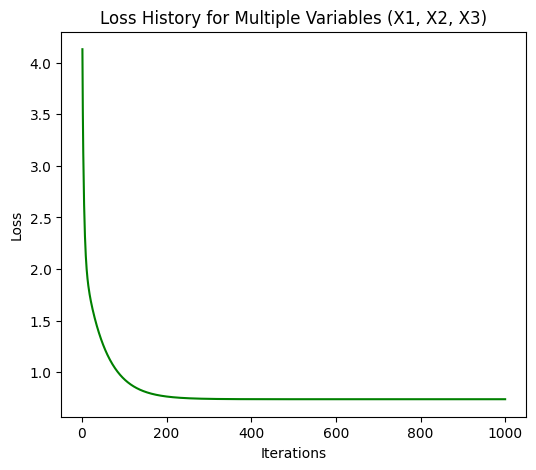

Final model parameters (theta): [ 5.31393577 -2.00368658  0.53260157 -0.26556795]
Final cost after training: 0.7384642444206543


In [12]:

X_all = data.iloc[:, 0:3].values  # Use all three explanatory variables X1, X2, X3

# Function for training using all three variables
def train_and_plot_multi(X, Y, learning_rate=0.01, iterations=1000):
    m = len(Y)

    # Add intercept term (bias) to X (column of ones)
    X_b = np.c_[np.ones((m, 1)), X]

    # Initialize theta
    theta = np.zeros(X_b.shape[1])

    # Perform gradient descent
    theta, cost_history = gradient_descent(X_b, Y, theta, learning_rate, iterations)

    # Plot the loss history over iterations
    plt.figure(figsize=(6, 5))
    plt.plot(range(1, iterations + 1), cost_history, color='green')
    plt.title(f'Loss History for Multiple Variables (X1, X2, X3)')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.show()

    return theta, cost_history[-1]


learning_rate = 0.1

iterations = 1000

print("Training with all three features (X1, X2, X3):")
theta_all, final_cost_all = train_and_plot_multi(X_all, Y, learning_rate=learning_rate, iterations=iterations)

print(f"Final model parameters (theta): {theta_all}")
print(f"Final cost after training: {final_cost_all}")



In [14]:
# Prediction function for new data points
def predict(X_new, theta):
    X_new_b = np.c_[np.ones((1,1)), X_new]
    return np.dot(X_new_b, theta)

# Predict for the new values (1, 1, 1), (2, 0, 4), and (3, 2, 1)
new_values = [(1, 1, 1), (2, 0, 4), (3, 2, 1)]

for i, X_new in enumerate(new_values):
    X_new = np.array(X_new).reshape(1, -1) # Reshape X_new to be a 2D array
    prediction = predict(X_new, theta_all)
    print(f"Prediction for X1={X_new[0,0]}, X2={X_new[0,1]}, X3={X_new[0,2]}: {prediction}")

Prediction for X1=1, X2=1, X3=1: [3.55821449]
Prediction for X1=2, X2=0, X3=4: [0.23971827]
Prediction for X1=3, X2=2, X3=1: [0.0990549]
